# 6. Encoder and Decoder

-------------------------------------------------------------------------------------------------------------------------------------------------------

* Many to Many RNN (multiple sequence as input and multiple sequence as output)

eg : Language translation , sentence suggestion etc ( sequence to sequence usecase )

* For Sequence to sequence usecase its not efficient to use Simple RNN OR LSTM OR GRU.

* Solution : Encoder and Decoder

--------------------------------------------------------------------------------------------------------------------------------------------------------

### Architecture

* The input is send into the Encoder which converts it into vector, These vectors are passed to the decoder.

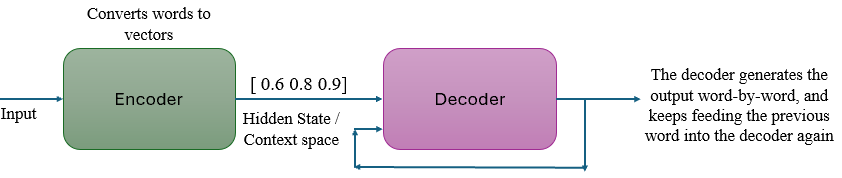

-------------------------------------------------------------------------------------------------------------------------------------------------------

### Detailed Architecture

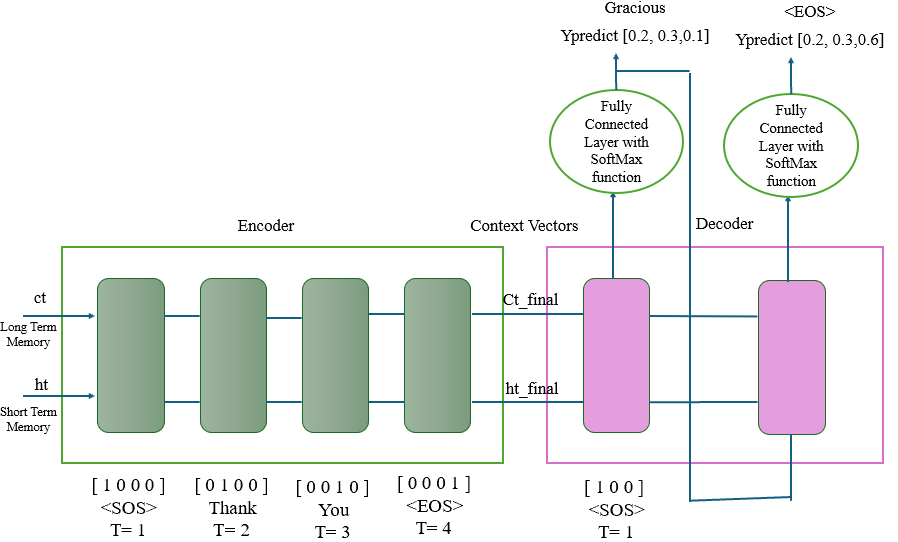

* Consider a supervised dataset which has <"SOS">Thank You<"EOS">" as independent variable and "gracious" as dependent variable.

### 1. Encoder Phase

* The words are converted to vectors using Word2Vec and sent into Encoder at each timestamp.
* T=1: The start-of-sequence token "SOS" is passed into the encoder, The encoder LSTM updates its hidden state (ht) and cell state (ct).
* T=2: The word "Thank" is passed into the encoder, The encoder updates ht and ct again.
* T=3: The word "you" is passed into the encoder, The encoder updates ht and ct again.
* T=4: The end-of-sequence token "EOS" is passed into the encoder, The encoder produces the final context vector (ht_final, ct_final).
* The fixed size context vector (ht_final, ct_final) is then passed to the decoder. (summary of the whole sentence is passed as context vector to decoder)

### 2. Decoder Phase

T=1: 

* The decoder is initialized with the context vector.
* The start-of-sequence "SOS" token is given as the first input to the decoder.
* The decoder LSTM processes "SOS" with fully connected layer and generates a probability distribution [0.2,0.3,0.1].
* The value 0.2 denotes the probability for "SOS" , 0.3 is probability for Gracious and 0.1 is for "EOS"
* The output "Gracious" is selected as the first output.

T=2: 

* The predicted word "Gracious" is fed back into the decoder as input (after doing embedding).
* The decoder updates its hidden state and generates another probability distribution.
* Now the output selected is "EOS", indicating the sequence is complete.
* Loss is calculted and backpropogation is done to reduce the loss

-------------------------------------------------------------------------------------------------------------------------------------------------------

### Problems with Encoder-Decoder Seq2Seq Architecture

* If the sentence is Short, the Context Vector can hold the whole context of the sentence. If the Sentence is very long, the context vector will only have more context information of the recent words with respect to timestamp and tends to forget initial words and it can also forget some important words.

* According to the researcher (Bleu Score - Model accuracy) was going down if the length of the sentence increases.

------------------------------------------------------------------------------------------------------

### Solution

Attention Mechanism

------------------------------------------------------------------------------------------------------